In [2]:
import pandas as pd 
from plotnine import * 

In [3]:
df_league = pd.read_csv("../Data/league_avg_per_game.csv") 
df_league

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2022-23,NBA,26.1,6-6,216.0,1092,241.9,41.8,88.1,...,114.5,0.475,0.361,0.783,99.1,0.545,12.6,24.0,0.210,114.7
1,2,2021-22,NBA,26.1,6-6,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2020-21,NBA,26.1,6-6,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2019-20,NBA,26.1,6-6,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2018-19,NBA,26.3,6-6,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,1953-54,NBA,26.4,6-4,197.0,324,NaN,28.1,75.4,...,79.5,0.372,NaN,0.709,NaN,0.372,NaN,NaN,0.311,NaN
70,71,1952-53,NBA,26.4,6-4,196.0,351,NaN,28.5,77.1,...,82.7,0.370,NaN,0.716,NaN,0.370,NaN,NaN,0.333,NaN
71,72,1951-52,NBA,26.3,6-4,195.0,330,NaN,29.6,80.8,...,83.7,0.367,NaN,0.735,NaN,0.367,NaN,NaN,0.302,NaN
72,73,1950-51,NBA,NaN,NaN,NaN,354,NaN,29.8,83.6,...,84.1,0.357,NaN,0.733,NaN,0.357,NaN,NaN,0.293,NaN


In [4]:
df_league.columns

Index(['Rk', 'Season', 'Lg', 'Age', 'Ht', 'Wt', 'G', 'MP', 'FG', 'FGA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'FG%', '3P%', 'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'ORtg'],
      dtype='object')

In [39]:
interested = ["Season", "3PA", "PTS", "Pace", "eFG%"] 
df = df_league[interested] 
df["Season"] = df["Season"].apply(lambda x: int(x[:-3])+1)
df

/var/folders/64/lts2my7j2q3g96y6cn7715xw0000gn/T/ipykernel_26707/1470853894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Season,3PA,PTS,Pace,eFG%
0,2023,34.2,114.5,99.1,0.545
1,2022,35.2,110.6,98.2,0.532
2,2021,34.6,112.1,99.2,0.538
3,2020,34.1,111.8,100.3,0.529
4,2019,32.0,111.2,100.0,0.524
...,...,...,...,...,...
69,1954,NaN,79.5,NaN,0.372
70,1953,NaN,82.7,NaN,0.370
71,1952,NaN,83.7,NaN,0.367
72,1951,NaN,84.1,NaN,0.357


In [40]:
df_long = df.melt(id_vars = "Season", var_name = "metrics", value_name = "values") 
df_long

,Season,metrics,values
0,2023,3PA,34.200
1,2022,3PA,35.200
2,2021,3PA,34.600
3,2020,3PA,34.100
4,2019,3PA,32.000
...,...,...,...
291,1954,eFG%,0.372
292,1953,eFG%,0.370
293,1952,eFG%,0.367
294,1951,eFG%,0.357


/Users/terryzhou/opt/anaconda3/lib/python3.9/site-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/Users/terryzhou/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 54 rows containing missing values.


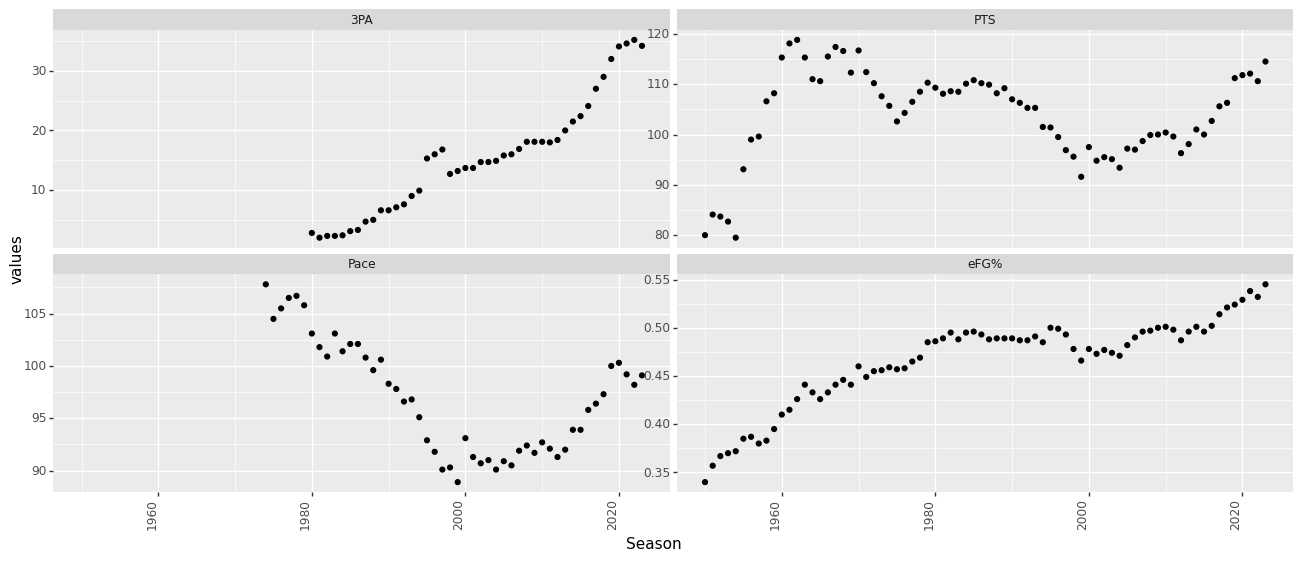

<ggplot: (353966644)>

In [41]:
g = (
    ggplot(df_long, aes(x = "Season", y = "values")) 
    + geom_point() 
    + facet_wrap("~metrics", scales = "free_y")
    + theme(axis_text_x=element_text(angle=90, hjust=1), figure_size = (16, 6))
)
g